XXX 책과 상이한 결과

- 입력데이터가 다른 듯(kodex200, kodex200x2)

In [1]:
from settings import *

In [20]:
tickers  = ['kodex200', 'kodex200x2', 'kbond3y']
read_df = get_data()
data = read_df[tickers].copy()
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kodex200    5433 non-null   float64
 1   kodex200x2  5433 non-null   float64
 2   kbond3y     5433 non-null   float64
dtypes: float64(3)
memory usage: 169.8 KB


In [21]:
data['2001-1'].head()

,kodex200,kodex200x2,kbond3y
Date,,,
2001-01-02,4522.960,1899.221,53566.015
2001-01-03,4521.101,1897.373,53592.022
2001-01-04,4850.476,2173.545,53740.753
2001-01-05,5058.861,2359.976,53843.470
2001-01-08,5106.615,2404.175,53910.829


In [35]:
s = '2001-1-2'
e = '2021-12-30'

In [4]:
# dd = pd.DataFrame()
# dd.index = pd.date_range(s, e, freq='D')
# denominator = len(pd.date_range(s, e, freq='D'))/len(pd.date_range(s, e, freq='Y'))
# dd['현금'] = pow(1.03, 1/denominator)
# dd['현금'] = dd['현금'].shift(1, fill_value=1.0)
# dd['현금'] = dd['현금'].cumprod()
# #%%
# data = pd.merge(data, dd, left_index=True, right_index=True, how='left')

In [36]:
data = data[s:e]
data

,kodex200,kodex200x2,현금
Date,,,
2001-01-02,4522.960,1899.221,53566.015
2001-01-03,4521.101,1897.373,53592.022
2001-01-04,4850.476,2173.545,53740.753
2001-01-05,5058.861,2359.976,53843.470
2001-01-08,5106.615,2404.175,53910.829
...,...,...,...
2021-12-24,40115.000,24180.000,111870.000
2021-12-27,39880.000,23905.000,111935.000
2021-12-28,40205.000,24225.000,111865.000


In [37]:
data.columns = ['kodex200', 'kodex200x2', '현금']
data.head()

,kodex200,kodex200x2,현금
Date,,,
2001-01-02,4522.960,1899.221,53566.015
2001-01-03,4521.101,1897.373,53592.022
2001-01-04,4850.476,2173.545,53740.753
2001-01-05,5058.861,2359.976,53843.470
2001-01-08,5106.615,2404.175,53910.829


In [82]:
def strategy_static(name, data, weights):
    s = bt.Strategy(name, 
            [
                bt.algos.RunMonthly(run_on_end_of_period=False), # 월초
                bt.algos.SelectAll(),
                bt.algos.WeighSpecified(**weights),
                PrintTempWeights(),
                bt.algos.Rebalance(),
                # bt.algos.PrintInfo('{now} {name} {_price} {temp} \n{_universe}')
            ])

    return bt.Backtest(s, data, initial_capital=100000000.0)

In [83]:
bt코스피20현금80 = strategy_static("코스피20%+현금80%",   data[['kodex200', '현금']], 
                               {'kodex200': 0.2, '현금':0.8}) 
bt코스피레버리지10현금90 = strategy_static("코스피레버리지10%+현금90%", data[['kodex200x2', '현금']], 
                                  {'kodex200x2': 0.1, '현금':0.9}) 

In [84]:
r_all = bt.run(bt코스피20현금80, bt코스피레버리지10현금90)

2001-01-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-02-01 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-03-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-04-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-05-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-06-01 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-07-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-08-01 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-09-03 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-10-04 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-11-01 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2001-12-03 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2002-01-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2002-02-01 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2002-03-04 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2002-04-01 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2002-05-02 00:00:00 코스피20%+현금80% kodex200:0.200 현금:0.800 
2002-06-03 00:

<AxesSubplot:title={'center':'Equity Progression'}>

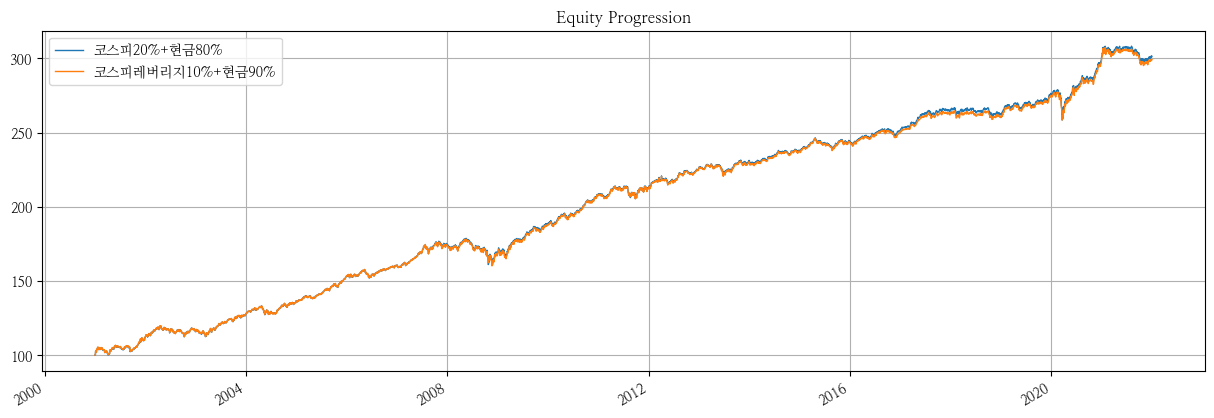

In [85]:
r_all.plot()

In [86]:
r_all.display()

Stat                 코스피20%+현금80%    코스피레버리지10%+현금90%
-------------------  -------------------  ---------------------------
Start                2001-01-01           2001-01-01
End                  2021-12-30           2021-12-30
Risk-free rate       0.00%                0.00%

Total Return         201.17%              199.05%
Daily Sharpe         1.21                 1.22
Daily Sortino        1.99                 2.00
CAGR                 5.39%                5.36%
Max Drawdown         -10.15%              -10.08%
Calmar Ratio         0.53                 0.53

MTD                  1.21%                1.14%
3m                   -0.34%               -0.45%
6m                   -2.08%               -2.20%
YTD                  0.12%                -0.20%
1Y                   0.12%                -0.20%
3Y (ann.)            4.72%                4.71%
5Y (ann.)            3.65%                3.63%
10Y (ann.)           3.54%                3.49%
Since Incep. (ann.)  5.39%                5

                  CAGR
코스피20%+현금80%     5.392
코스피레버리지10%+현금90% 5.356
                     MDD
코스피20%+현금80%     -10.150
코스피레버리지10%+현금90% -10.085


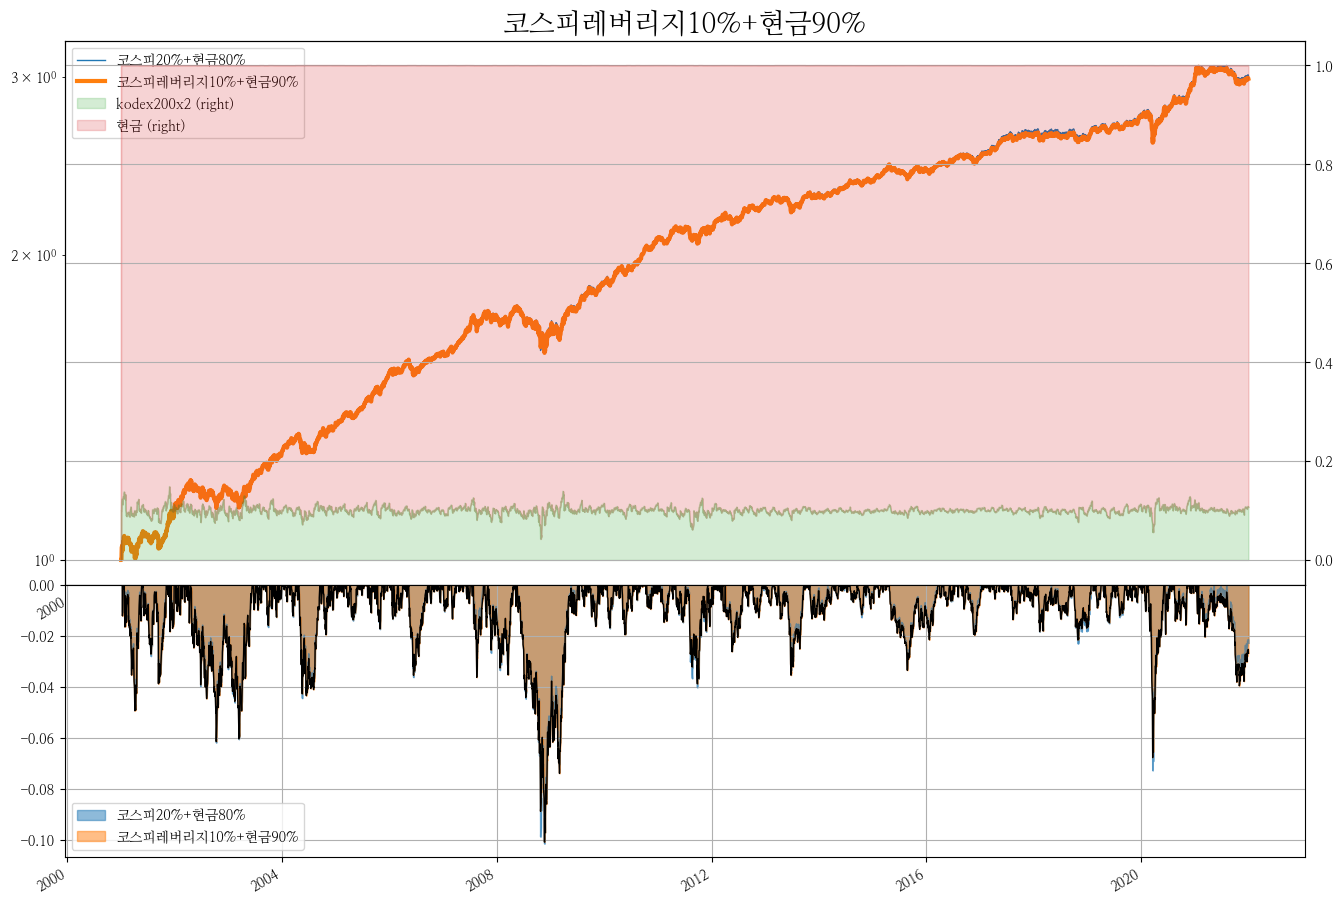

In [87]:
plot_assets(r_all, '2001', '2021', '코스피레버리지10%+현금90%')

## WeighFixedRateAverageMomentumScore

In [88]:
class WeighFixedRateAverageMomentumScore(bt.Algo):
    def __init__(self, lookback=12, fixed_rate=0.25, 
                 cash='현금', cash_weigh=0.0):
        """ 고정비율*평균모멘텀스코어 비율 만큼 투자. 
        
            매월초 리밸런싱한다고 가정하고 평균 모멘텀 스코어는 전달 종가를 기준으로 계산한다.
        
            lookback : 모멘텀스코어 계산하는 개월수
            fixed_rate : 주식에 투자할 고정 비율
            cash : cash자산 이름(기본값: 현금)
            cash_weigh : 현금비중 (기본값: 0 -> 고려하지 않음), 현금비중 올라감
        """
        super(WeighFixedRateAverageMomentumScore, self).__init__()
        self.lookback = lookback
        self.fixed_rate = fixed_rate
        self.cash = cash
        self.cash_weigh = cash_weigh

    def average_momentum_score(self, prc):
        ''' x : Series (DataFrame의 컬럼)
            x[-1] : 기준일. x의 현재값
            (오늘날짜/과거날짜 - 1) > 0 보다 크면 1, 아니면 0
            => 오늘날짜/과거날짜 > 1 => 오늘날짜 > 과거날짜  => x[-1] > x
        '''
        if len(prc) != (self.lookback+1):
            raise ValueError(f"must be resample('M').last(), {prc}")
        ams = pd.Series(dtype='float64')
        for c in prc.columns:
            ams[c] = np.mean(np.where(prc[c][-1]>prc[c], 1, 0)[:-1])# 당일 날짜 비교는 제외해준다 [:-1]

        return ams


    def __call__(self, target):
        selected = target.temp['selected'].copy()
        selected.remove(self.cash)

        prev_month = target.now - pd.DateOffset(months=1)
        t0 = prev_month.strftime("%Y-%m")
        start = (prev_month - pd.DateOffset(months=self.lookback)).strftime("%Y-%m")

        # prc = target.universe[selected].loc[start:t0]
        prc = target.universe.loc[start:t0, selected].resample('M').last()
        print(f"\nprc : {target.now} {t0} ~ {start}") #{prc}
        if len(prc) < (self.lookback+1):
            print(f"{target.now} not yet data\n")
            return False

        weights = (self.average_momentum_score(prc)*(1 - self.cash_weigh)) / len(selected)
        weights *= self.fixed_rate #!!!! 추가
        weights = pd.Series(weights, index=selected)
        weights[self.cash] = 1-weights.sum()

        target.temp['weights'] = weights

        return True

In [89]:
def average_momentum_score_fixed_rate(name, data, months=12, fixed_rate=0.25, cash='현금'):
    st = bt.Strategy(name,
        [
            bt.algos.RunMonthly(run_on_first_date=True,
                                run_on_end_of_period=False, #월초
                                run_on_last_date=False),
            bt.algos.SelectAll(),
            WeighFixedRateAverageMomentumScore(months, fixed_rate, cash),
            PrintTempWeights(),
            bt.algos.Rebalance()
        ]
    )
    return bt.Backtest(st, data, initial_capital=100000000)

In [90]:
bt레버리지모멘텀 = average_momentum_score_fixed_rate(
               name="레버리지고정비율+모멘텀", 
               data=data[['kodex200x2', '현금']], 
               months=12, 
               fixed_rate=0.25, 
               cash='현금')
r레버리지모멘텀 = bt.run(bt레버리지모멘텀)


prc : 2001-01-02 00:00:00 2000-12 ~ 1999-12
2001-01-02 00:00:00 not yet data


prc : 2001-02-01 00:00:00 2001-01 ~ 2000-01
2001-02-01 00:00:00 not yet data


prc : 2001-03-02 00:00:00 2001-02 ~ 2000-02
2001-03-02 00:00:00 not yet data


prc : 2001-04-02 00:00:00 2001-03 ~ 2000-03
2001-04-02 00:00:00 not yet data


prc : 2001-05-02 00:00:00 2001-04 ~ 2000-04
2001-05-02 00:00:00 not yet data


prc : 2001-06-01 00:00:00 2001-05 ~ 2000-05
2001-06-01 00:00:00 not yet data


prc : 2001-07-02 00:00:00 2001-06 ~ 2000-06
2001-07-02 00:00:00 not yet data


prc : 2001-08-01 00:00:00 2001-07 ~ 2000-07
2001-08-01 00:00:00 not yet data


prc : 2001-09-03 00:00:00 2001-08 ~ 2000-08
2001-09-03 00:00:00 not yet data


prc : 2001-10-04 00:00:00 2001-09 ~ 2000-09
2001-10-04 00:00:00 not yet data


prc : 2001-11-01 00:00:00 2001-10 ~ 2000-10
2001-11-01 00:00:00 not yet data


prc : 2001-12-03 00:00:00 2001-11 ~ 2000-11
2001-12-03 00:00:00 not yet data


prc : 2002-01-02 00:00:00 2001-12 ~ 2000-12
2002-01

In [91]:
bt모멘텀 = average_momentum_score_fixed_rate(
             name="고정비율+모멘텀", 
             data=data[['kodex200', '현금']], 
             months=12,
             fixed_rate=0.25, 
             cash='현금')
r모멘텀 = bt.run(bt모멘텀)


prc : 2001-01-02 00:00:00 2000-12 ~ 1999-12
2001-01-02 00:00:00 not yet data


prc : 2001-02-01 00:00:00 2001-01 ~ 2000-01
2001-02-01 00:00:00 not yet data


prc : 2001-03-02 00:00:00 2001-02 ~ 2000-02
2001-03-02 00:00:00 not yet data


prc : 2001-04-02 00:00:00 2001-03 ~ 2000-03
2001-04-02 00:00:00 not yet data


prc : 2001-05-02 00:00:00 2001-04 ~ 2000-04
2001-05-02 00:00:00 not yet data


prc : 2001-06-01 00:00:00 2001-05 ~ 2000-05
2001-06-01 00:00:00 not yet data


prc : 2001-07-02 00:00:00 2001-06 ~ 2000-06
2001-07-02 00:00:00 not yet data


prc : 2001-08-01 00:00:00 2001-07 ~ 2000-07
2001-08-01 00:00:00 not yet data


prc : 2001-09-03 00:00:00 2001-08 ~ 2000-08
2001-09-03 00:00:00 not yet data


prc : 2001-10-04 00:00:00 2001-09 ~ 2000-09
2001-10-04 00:00:00 not yet data


prc : 2001-11-01 00:00:00 2001-10 ~ 2000-10
2001-11-01 00:00:00 not yet data


prc : 2001-12-03 00:00:00 2001-11 ~ 2000-11
2001-12-03 00:00:00 not yet data


prc : 2002-01-02 00:00:00 2001-12 ~ 2000-12
2002-01

In [92]:
bt고정비율 = strategy_static("고정비율",   data[['kodex200', '현금']], 
                         {'kodex200': 0.25, '현금':0.75}) 
bt레버리지고정비율 = strategy_static("레버리지고정비율",   data[['kodex200x2', '현금']], 
                             {'kodex200x2': 0.25, '현금':0.75}) 
r고정비율 = bt.run(bt고정비율)
r레버리지고정비율 = bt.run(bt레버리지고정비율)

2001-01-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-02-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-03-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-04-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-05-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-06-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-07-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-08-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-09-03 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-10-04 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-11-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2001-12-03 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-01-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-02-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-03-04 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-04-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-05-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-06-03 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-07-02 00:00:00 고정비율 kodex200:0.250 현금:0.750 
2002-08-01 00:00:00 고정비율 kodex200:0.250 현금:0.750 


In [93]:
r_all = bt.run(bt고정비율, bt모멘텀, bt레버리지고정비율, bt레버리지모멘텀)

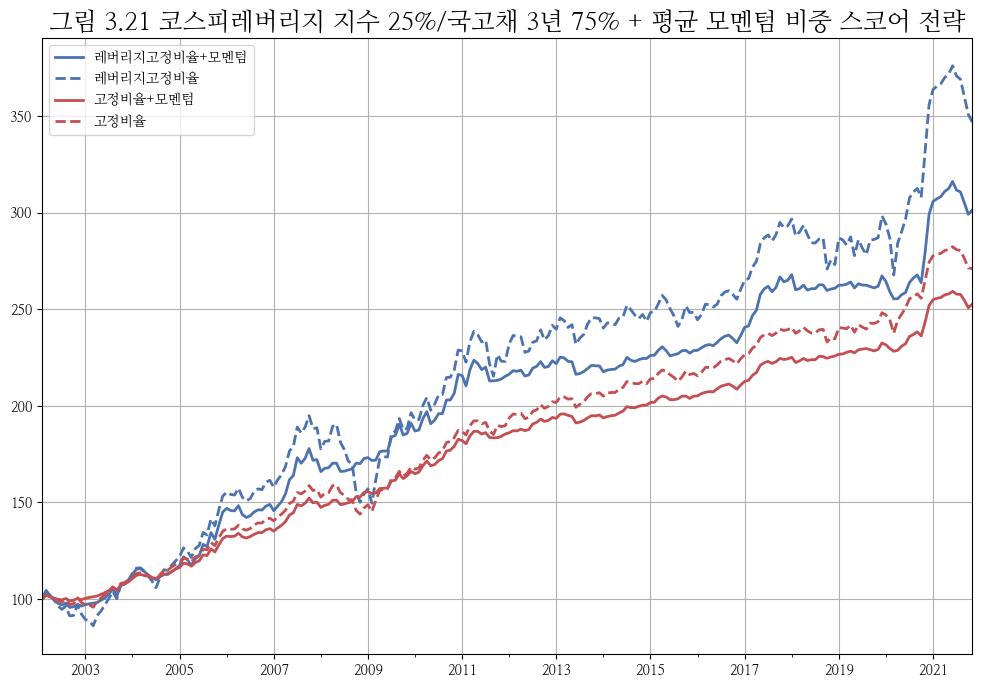

In [105]:
# r_all.set_date_range('2002-02-01')
# r_all.plot(freq='M', figsize=(12,8));
r레버리지모멘텀.set_date_range('2002-02-01')
r레버리지고정비율.set_date_range('2002-02-01')
r모멘텀.set_date_range('2002-02-01')
r고정비율.set_date_range('2002-02-01')

ax1 = r레버리지모멘텀.plot(freq='M', color='b', lw=2, figsize=(12,8));
r레버리지고정비율.plot(ax=ax1, freq='M', color='b', ls='--', lw=2, figsize=(12,8));
r모멘텀.plot(ax=ax1, freq='M', color='r', ls='-', lw=2, figsize=(12,8));
r고정비율.plot(ax=ax1, freq='M', color='r', ls='--', lw=2, figsize=(12,8));
plt.title("그림 3.21 코스피레버리지 지수 25%/국고채 3년 75% + 평균 모멘텀 비중 스코어 전략", fontsize=18);

In [106]:
r_all.set_date_range('2002-02-01')
r_all.display()

Stat                 고정비율    고정비율+모멘텀    레버리지고정비율    레버리지고정비율+모멘텀
-------------------  ----------  -----------------  ------------------  -------------------------
Start                2002-02-01  2002-02-01         2002-02-01          2002-02-01
End                  2021-12-30  2021-12-30         2021-12-30          2021-12-30
Risk-free rate       0.00%       0.00%              0.00%               0.00%

Total Return         183.91%     161.02%            278.26%             219.92%
Daily Sharpe         1.03        1.40               0.71                0.95
Daily Sortino        1.67        2.25               1.14                1.49
CAGR                 5.38%       4.94%              6.91%               6.01%
Max Drawdown         -13.09%     -5.10%             -27.38%             -11.43%
Calmar Ratio         0.41        0.97               0.25                0.53

MTD                  1.54%       0.16%              2.99%               0.28%
3m                   -0.36%      -0.62%    

In [108]:
r_all.prices.resample('MS').first().to_drawdown_series().min()

고정비율           -0.100
고정비율+모멘텀       -0.031
레버리지고정비율       -0.240
레버리지고정비율+모멘텀   -0.070
dtype: float64

              CAGR
고정비율         5.381
고정비율+모멘텀     4.937
레버리지고정비율     6.911
레버리지고정비율+모멘텀 6.015
                 MDD
고정비율         -13.094
고정비율+모멘텀      -5.095
레버리지고정비율     -27.378
레버리지고정비율+모멘텀 -11.426


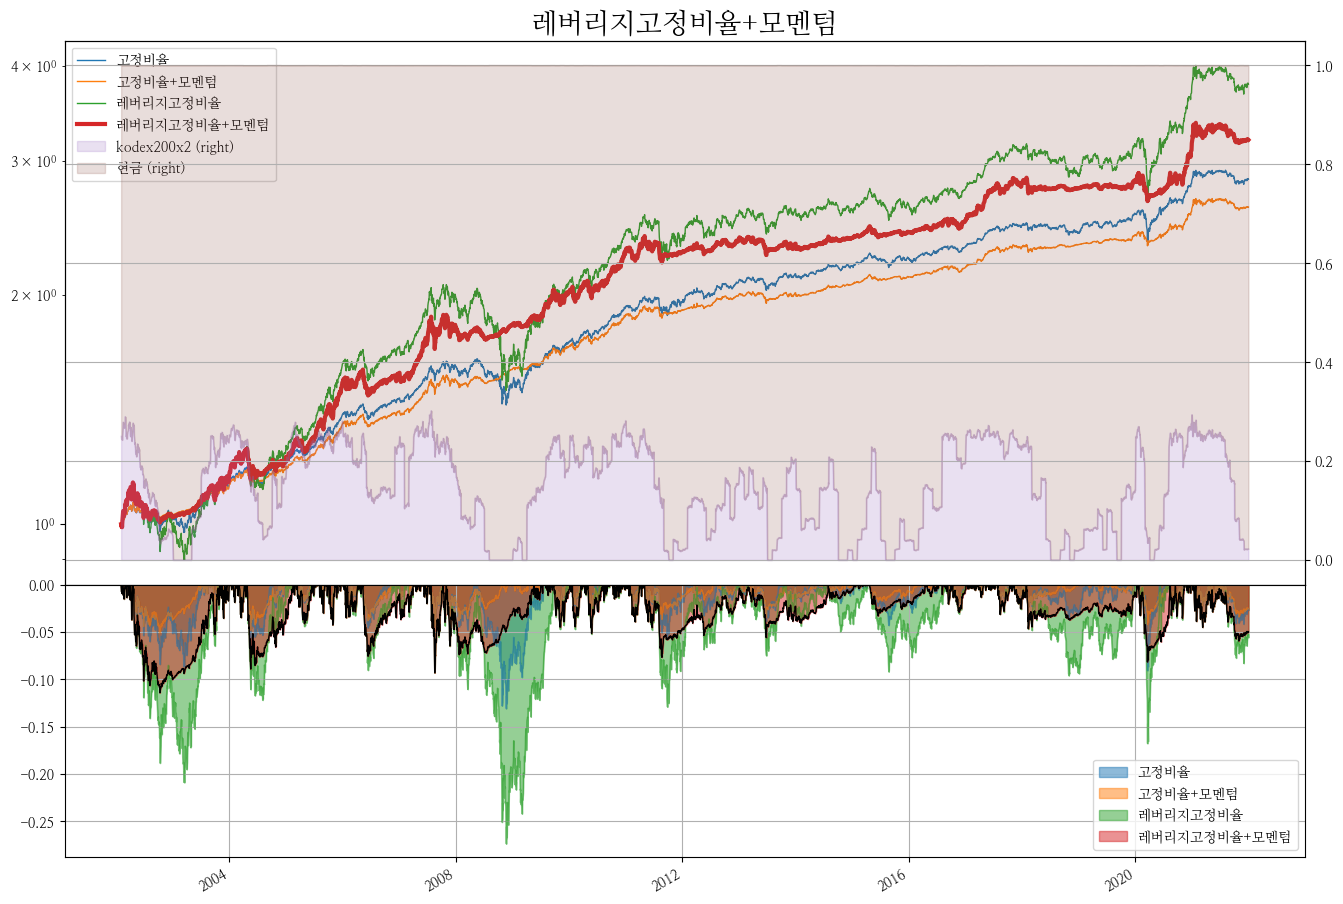

In [107]:
plot_assets(r_all, '2002-2-1', '2021-12-30', "레버리지고정비율+모멘텀")